In [1]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 11.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.2 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.8.2 which is incompatible.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible

In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
data_set = "/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/"
# Run one example
dir_list = os.listdir(data_set)
dir_list[-8:]

['ss2_s1_sp20_f_02.wav',
 'ss1_s4_sp10_m_04.wav',
 'ss1_s4_sp16_f_06.wav',
 'ss1_s3_sp10_m_06.wav',
 'ss1_s4_sp6_m_03.wav',
 'ss1_s2_sp9_m_01.wav',
 'ss1_s1_sp12_f_04.wav',
 'ss1_s2_sp5_m_05.wav']

In [15]:
emotion_map = {
    "01": "Anger",
    "02": "Disgust",
    "03": "Fear",
    "04": "Happiness",
    "05": "Sadness",
    "06": "Surprise"
}

# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for file_name in dir_list:
    file_path = os.path.join(data_set, file_name)
    emo_abb = file_name.split('.')[0].split('_')[-1]
    emotion = emotion_map.get(emo_abb)
#     print(emotion)
    data.append([emotion, file_path])
#     print(data)

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [16]:
df.head(5)

,emotion,path
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...


In [17]:
ref = df
ref.head(10)

,emotion,path
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
5,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
6,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
7,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
8,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...
9,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo...


In [18]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
94,Fear,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp21_f_03.wav
578,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp17_f_05.wav
655,Anger,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp1_m_01.wav
753,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s1_sp5_m_02.wav
472,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s1_sp16_f_05.wav
...,...,...
721,Surprise,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s5_sp18_f_06.wav
620,Anger,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp14_m_01.wav
63,Surprise,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s5_sp11_m_06.wav
725,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s5_sp21_f_05.wav


<Axes: ylabel='count'>

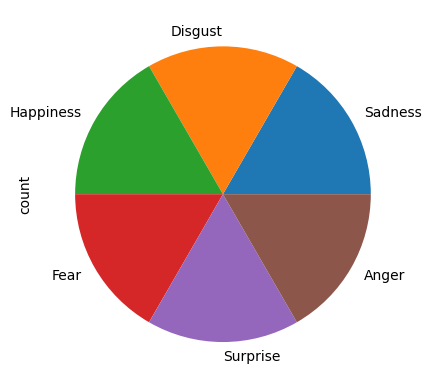

In [19]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [20]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.8 MB/s eta 0:00:0000:010:01


In [21]:
import resampy
from resampy import resample
import librosa

In [22]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

792


,Features
0,"[-18.23208999633789, -16.154672622680664, -15.57658576965332, -14.771672248840332, -14.404592514038086, -15.491765975952148, -17.258481979370117, -15.936866760253906, -16.5253849029541, -17.641300201416016, -17.93020248413086, -16.395633697509766, -14.4347562789917, -13.285189628601074, -16.230878829956055, -17.199146270751953, -16.040739059448242, -15.66845703125, -13.849004745483398, -8.494277954101562, -3.7361671924591064, -0.9104371070861816, 0.9444512128829956, 0.6575039625167847, 1.622605562210083, 1.2795382738113403, -0.4342184066772461, -1.4879356622695923, -1.6731865406036377, -0.3981916010379791, -0.8051344156265259, -0.7121298909187317, -0.7253570556640625, -0.5481611490249634, 0.10273466259241104, -0.7197372913360596, -0.29758381843566895, -0.9504826664924622, -0.7421237230300903, 0.047907065600156784, 0.11486847698688507, 0.46353253722190857, -1.1475400924682617, -2.399904727935791, -1.5140053033828735, -2.77707576751709, -3.303117275238037, -5.642588138580322, -7.103523254394531, -7.794071197509766, -6.045815467834473, -4.687504291534424, -4.063616752624512, -2.2465693950653076, -1.8860054016113281, -1.8895000219345093, 0.08808698505163193, -0.022574711591005325, -1.5509579181671143, -0.9370850324630737, -0.0911240205168724, -0.9918583035469055, -3.666810989379883, -7.459535121917725, -8.183354377746582, -10.262125015258789, -11.557538986206055, -12.568379402160645, -11.902239799499512, -11.789018630981445, -11.054410934448242, -9.843704223632812, -10.022459030151367, -9.887548446655273, -9.529524803161621, -7.568506717681885, -2.659485340118408, -0.7541743516921997, -0.40010327100753784, -0.7111366391181946, -3.048834800720215, -6.4824371337890625, -3.5001144409179688, -2.488527774810791, -2.3921186923980713, -2.7122159004211426, -2.0608882904052734, -0.7153217196464539, -0.8130908012390137, -1.3886173963546753, -1.6575145721435547, -1.495011329650879, -0.583022952079773, -1.2296537160873413, -1.9234201908111572, -2.4791438579559326, -1.9625762701034546, -2.548696994781494, -2.615845203399658, -5.054185390472412, ...]"
1,"[-17.751953125, -16.889392852783203, -17.671077728271484, -20.66849136352539, -22.05678939819336, -19.530054092407227, -17.482690811157227, -17.754079818725586, -17.77712631225586, -19.578693389892578, -22.341039657592773, -19.662315368652344, -18.476276397705078, -18.343647003173828, -19.512311935424805, -21.213462829589844, -22.397186279296875, -22.336681365966797, -21.616039276123047, -20.105178833007812, -19.80892562866211, -20.090877532958984, -17.827327728271484, -19.284255981445312, -21.264211654663086, -20.627294540405273, -19.800601959228516, -18.683517456054688, -19.023405075073242, -19.89153480529785, -21.235177993774414, -20.972505569458008, -22.330120086669922, -23.240503311157227, -21.13041877746582, -19.6049861907959, -20.225919723510742, -20.898334503173828, -19.033382415771484, -19.265501022338867, -17.414012908935547, -16.91123390197754, -16.65899658203125, -16.994178771972656, -16.49951171875, -10.593642234802246, -8.68077278137207, -8.720441818237305, -10.444223403930664, -11.367316246032715, -12.38413143157959, -12.9617919921875, -12.950445175170898, -11.141257286071777, -9.201772689819336, -9.403925895690918, -10.070249557495117, -12.063653945922852, -11.961548805236816, -12.685663223266602, -14.458120346069336, -15.45899486541748, -14.125262260437012, -12.88067626953125, -11.859720230102539, -12.229323387145996, -13.44458293914795, -13.476000785827637, -15.642969131469727, -14.88652229309082, -14.041946411132812, -13.192642211914062, -12.969799995422363, -13.093374252319336, -13.464700698852539, -14.049044609069824, -15.05310344696045, -17.523292541503906, -17.436803817749023, -17.950271606445312, -17.825538635253906, -17.881336212158203, -16.910642623901367, -15.599321365356445, -14.593412399291992, -15.435525894165039, -11.38483715057373, -9.830144882202148, -10.219778060913086, -9.243501663208008, -8.05350112915039, -9.052713394165039, -10.351641654968262,

In [23]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp8_m_05.wav,-18.232090,-16.154673,-15.576586,-14.771672,-14.404593,-15.491766,-17.258482,-15.936867,...,0.565264,0.526710,0.528355,0.512784,0.496950,0.510482,0.525546,0.525198,0.535796,0.290251
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss2_s1_sp15_m_02.wav,-17.751953,-16.889393,-17.671078,-20.668491,-22.056789,-19.530054,-17.482691,-17.754080,...,0.488444,0.478612,0.535538,0.662859,0.731913,0.597110,0.520251,0.531135,0.542608,0.056424
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp10_m_02.wav,-16.456020,-15.021257,-17.454529,-18.289089,-16.512754,-15.951030,-15.236929,-14.834314,...,0.700453,0.694741,0.649105,0.692887,0.687737,0.694986,0.688074,0.630640,0.608008,0.124804
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp12_f_05.wav,-17.706743,-15.730913,-14.695745,-14.783786,-15.608607,-14.548620,-13.363307,-13.364851,...,0.607903,0.483178,0.403205,0.436413,0.527717,0.498116,0.473880,0.538381,0.495741,0.287259
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp18_f_04.wav,-8.637339,-12.054542,-17.772461,-18.083191,-19.196117,-20.470360,-20.447578,-21.346563,...,0.452545,0.492655,0.483109,0.460752,0.431459,0.440212,0.462116,0.453597,0.473860,0.093769


In [24]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(792, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp8_m_05.wav,-18.232090,-16.154673,-15.576586,-14.771672,-14.404593,-15.491766,-17.258482,-15.936867,...,0.565264,0.526710,0.528355,0.512784,0.496950,0.510482,0.525546,0.525198,0.535796,0.290251
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss2_s1_sp15_m_02.wav,-17.751953,-16.889393,-17.671078,-20.668491,-22.056789,-19.530054,-17.482691,-17.754080,...,0.488444,0.478612,0.535538,0.662859,0.731913,0.597110,0.520251,0.531135,0.542608,0.056424
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp10_m_02.wav,-16.456020,-15.021257,-17.454529,-18.289089,-16.512754,-15.951030,-15.236929,-14.834314,...,0.700453,0.694741,0.649105,0.692887,0.687737,0.694986,0.688074,0.630640,0.608008,0.124804
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp12_f_05.wav,-17.706743,-15.730913,-14.695745,-14.783786,-15.608607,-14.548620,-13.363307,-13.364851,...,0.607903,0.483178,0.403205,0.436413,0.527717,0.498116,0.473880,0.538381,0.495741,0.287259
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp18_f_04.wav,-8.637339,-12.054542,-17.772461,-18.083191,-19.196117,-20.470360,-20.447578,-21.346563,...,0.452545,0.492655,0.483109,0.460752,0.431459,0.440212,0.462116,0.453597,0.473860,0.093769


In [25]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
178,-15.076093,-14.259036,-13.524099,-12.541212,-11.698137,-10.829969,-10.963608,-10.859942,-12.188362,-14.470510,...,0.510291,0.511667,0.581133,0.668775,0.711908,0.706570,0.635224,0.568471,0.525784,0.252685
526,-15.730845,-13.805580,-13.619682,-12.788931,-11.677416,-11.327201,-10.575622,-9.701216,-10.083949,-10.834958,...,0.668940,0.677778,0.623075,0.589280,0.642752,0.652462,0.658433,0.674549,0.656835,0.217637
535,-13.457234,-10.300710,-9.278791,-10.327767,-10.620802,-11.029396,-7.614554,-7.072154,-9.765598,-14.580419,...,0.690781,0.694953,0.694056,0.624176,0.581463,0.560474,0.536730,0.493134,0.491718,0.075169
177,-15.366858,-13.088682,-12.567344,-13.904831,-13.716357,-12.931892,-13.365718,-13.994757,-14.577765,-13.659801,...,0.714288,0.652867,0.647054,0.614678,0.566696,0.547316,0.571395,0.630207,0.661472,0.146438
549,-17.371960,-16.939030,-16.282932,-14.395569,-14.328905,-13.742630,-14.041967,-14.741636,-14.606364,-13.483472,...,0.576566,0.561315,0.619159,0.673190,0.661232,0.519409,0.427677,0.407765,0.453507,0.298995
640,-10.896160,-8.856192,-8.943876,-10.824006,-12.385853,-12.997188,-12.858333,-12.395228,-11.789522,-11.399020,...,0.628101,0.653351,0.604023,0.642144,0.664456,0.586954,0.532862,0.587305,0.693536,0.108358
257,-6.810095,-9.858066,-14.725741,-15.605168,-14.768736,-10.915087,-8.622420,-5.911115,-4.778327,-6.595392,...,0.488750,0.474238,0.502532,0.508141,0.512960,0.516045,0.491856,0.558812,0.676059,0.043235
351,-17.306911,-15.614428,-15.793779,-15.970675,-16.739370,-17.314058,-20.115017,-17.589634,-16.283810,-12.685385,...,0.659165,0.684051,0.683186,0.633713,0.577709,0.538306,0.486073,0.456628,0.489078,0.064683
464,0.482919,1.481731,-1.047119,0.108954,-1.899534,-10.078980,-11.443519,-11.848093,-13.348277,-16.741726,...,0.680423,0.636029,0.607332,0.611435,0.584180,0.590095,0.635846,0.659409,0.653161,0.087542
15,-6.004521,-7.183183,-11.442333,-10.005465,-8.030142,-7.743871,-9.118690,-10.571936,-13.190733,-14.151799,...,0.488939,0.517420,0.566169,0.505269,0.483780,0.468760,0.448998,0.490096,0.540319,0.050522


In [26]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(633, 531, 1)
(159, 531, 1)


In [27]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise'],
      dtype=object)

In [28]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

792


,mel_spectrogram
0,"[-36.562824, -34.678226, -34.729774, -34.625645, -34.253635, -34.38421, -35.14237, -35.282578, -34.849205, -35.221207, -35.260517, -35.255558, -35.126583, -34.583664, -34.269268, -33.82475, -32.62676, -31.724003, -26.210346, -18.374199, -11.053859, -4.105196, -1.2697084, 0.38032877, 0.67928725, 0.9298139, -5.225822, -14.784378, -18.553457, -19.971035, -20.498823, -18.913845, -14.486911, -11.105882, -8.245234, -6.2996984, -5.200334, -4.5076375, -3.0362394, -2.2479103, -2.1119564, -1.775276, -1.1803892, -1.7881415, -3.9303367, -9.31784, -15.882697, -20.535372, -23.590597, -26.077192, -27.593292, -28.087362, -25.412588, -22.59275, -20.863325, -15.693707, -5.0065985, 0.26309437, 1.3084189, 1.5389427, 1.3987757, -2.7223144, -12.499899, -19.21796, -22.6258, -24.637648, -25.866974, -27.049288, -28.633404, -29.967365, -30.57534, -30.82667, -32.46933, -33.18406, -30.71358, -18.637932, -7.3149166, -1.9460154, 0.083964795, -0.2066116, -5.8600936, -11.433985, -9.779267, -6.454673, -4.5081058, -3.7543192, -3.417426, -4.297293, -6.2825007, -6.709044, -6.581796, -5.4892893, -5.247511, -5.561778, -5.5553756, -5.167498, -4.6384153, -4.666012, -5.3253345, -8.345863, ...]"
1,"[-47.192764, -45.98164, -46.217033, -46.778893, -47.42641, -46.973213, -46.127914, -45.83089, -45.402546, -45.886284, -46.999424, -46.577877, -46.251575, -45.749176, -45.169334, -45.526337, -45.024227, -44.805695, -45.06215, -45.07538, -45.38544, -45.697353, -46.11881, -46.141586, -46.32981, -46.563152, -46.758488, -46.224487, -46.311108, -46.487293, -46.39901, -46.443344, -47.436306, -47.11004, -46.516033, -45.61055, -45.93926, -46.346077, -46.372765, -46.202087, -46.22722, -46.346252, -46.733948, -46.21414, -35.37507, -24.285923, -20.747145, -20.563215, -21.502323, -22.767656, -24.934076, -26.921223, -29.222433, -28.408138, -25.035688, -23.196518, -22.65497, -23.947788, -24.673697, -24.762314, -26.160307, -27.414818, -27.887564, -26.10852, -24.533283, -23.490583, -22.02236, -20.455355, -22.272955, -26.390623, -22.544563, -17.296234, -17.49706, -19.193026, -22.618809, -29.512232, -34.598465, -37.569626, -39.874207, -42.167877, -42.622627, -43.56301, -44.093903, -43.415043, -40.588776, -37.617752, -33.666767, -30.955942, -29.618046, -28.229074, -25.755005, -23.828259, -22.123096, -21.892622, -22.113808, -25.409708, -32.48589, -37.409515, -34.41748, -23.798637, ...]"
2,"[-35.910946, -34.349247, -35.214737, -35.01993, -34.430035, -33.99372, -34.269073, -34.192627, -33.530636, -33.341896, -33.600327, -34.337944, -34.101677, -33.60747, -33.25904, -33.1619, -32.8717, -33.68418, -34.454327, -34.74157, -34.088684, -33.389263, -33.512127, -33.40223, -33.53706, -33.37592, -33.188923, -33.366264, -33.679195, -33.706345, -33.541325, -33.61171, -33.251705, -33.835194, -34.638702, -34.312626, -34.391556, -33.77405, -34.109226, -33.73992, -33.657265, -33.37048, -33.431896, -33.080856, -32.4572, -32.6188, -32.063683, -31.52365, -31.473154, -32.036346, -32.83364, -32.234867, -31.785751, -31.978312, -31.388119, -31.627565, -31.298325, -31.356495, -30.873323, -29.527905, -29.17784, -29.510918, -28.741505, -28.497156, -29.600178, -29.85419, -29.533838, -29.42015, -29.42327, -28.83831, -27.950333, -27.866682, -28.577328, -28.505453, -28.648643, -29.230547, -29.439074, -30.316978, -31.46442, -31.357874, -31.252943, -32.45042, -33.21183, -33.4554, -34.13496, -34.56161, -34.16525, -34.045624, -33.995743, -33.76956, -33.464092, -33.216095, -33.373512, -33.592846, -34.0923, -33.033237, -33.374622, -33.94432, -33.342094, -33.72673, ...]"
3,"[-35.318737, -34.01395, -34.613037, -34.966385, -35.33769, -34.585037, -33.61387, -33.34844, -31.855865, -24.700274, -19.52884, -17.47726, -16.078783, -14.033639, -11.715947, -13.752764, -19.267683, -19.092648, -17.531424, -8.98078, -4.438567, -5.0115123, -6.2570786, -7.808541, -8.175652, -7.913194, -7.9971824, -8.417854, -7.8739567, -7.626487, -7.5584173, -7.79198, -8.620154, -8.641355, -7.991595, -8.4166155, -8.984951, -9.091571, -9.96591, -

In [29]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp8_m_05.wav,-36.562824,-34.678226,-34.729774,-34.625645,-34.253635,-34.384209,-35.142368,-35.282578,...,-15.781397,-11.513783,-7.686689,-6.210385,-5.820165,-6.033599,-8.823420,-15.813701,-22.438196,-25.376783
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss2_s1_sp15_m_02.wav,-47.192764,-45.981640,-46.217033,-46.778893,-47.426411,-46.973213,-46.127914,-45.830891,...,-29.806147,-30.610313,-31.560566,-33.569252,-35.816540,-38.012215,-39.652985,-41.552788,-42.537003,-42.204933
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp10_m_02.wav,-35.910946,-34.349247,-35.214737,-35.019932,-34.430035,-33.993721,-34.269073,-34.192627,...,-29.172146,-29.997137,-30.299114,-31.091187,-31.674028,-32.116428,-32.216671,-31.448856,-30.965645,-32.530373
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp12_f_05.wav,-35.318737,-34.013950,-34.613037,-34.966385,-35.337688,-34.585037,-33.613869,-33.348438,...,-30.923130,-30.091656,-29.807673,-30.213699,-30.148012,-30.223164,-30.458088,-30.504625,-30.288572,-32.083042
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp18_f_04.wav,-24.851036,-28.143766,-34.749676,-37.652710,-38.547588,-38.757965,-38.438019,-37.236614,...,-23.872171,-23.372808,-22.494795,-20.946035,-21.957136,-23.227465,-25.641560,-32.677185,-36.173218,-34.618935


In [30]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
178,-35.884285,-33.574833,-33.775162,-33.935055,-33.807590,-32.681004,-32.435959,-33.055843,-33.659000,-34.699760,...,-9.354778,-9.002761,-11.208613,-15.853632,-18.614193,-17.069038,-7.965089,-3.493727,-2.494211,-3.401942
526,-36.104279,-34.368931,-33.847668,-34.190113,-34.027950,-34.285362,-33.338196,-33.262764,-33.689163,-33.586292,...,-27.268602,-29.305592,-31.957275,-32.096745,-32.129517,-32.867966,-31.155859,-27.828878,-25.600590,-19.090912
535,-36.462227,-32.406136,-31.518454,-30.429823,-31.163174,-34.111687,-33.977669,-34.210793,-35.907219,-35.442955,...,-8.596466,-7.928026,-16.151791,-21.861547,-25.803432,-23.206612,-17.343588,-11.556694,-11.243721,-10.015772
177,-37.834671,-35.561874,-35.621582,-35.872375,-36.039700,-36.347672,-36.080906,-35.584179,-35.578369,-36.257267,...,-13.725018,-12.256768,-12.312217,-12.288198,-11.939747,-12.142661,-12.739235,-14.245637,-15.192696,-13.833753
549,-32.931534,-30.215631,-29.500097,-28.319557,-27.971889,-28.202538,-28.393427,-29.255777,-29.722795,-30.767046,...,-24.971098,-24.069702,-23.346531,-22.417391,-19.848738,-11.723396,-1.712078,2.380170,4.272850,5.692936
640,-30.558662,-27.026756,-26.829102,-27.276278,-27.339928,-28.187691,-28.728710,-29.090246,-29.384401,-29.405960,...,-28.693218,-23.644941,-19.118641,-16.697384,-16.621771,-18.943657,-19.816572,-17.461737,-13.579779,-9.253995
257,-25.058336,-28.753099,-35.295044,-36.529232,-30.828959,-18.673552,-13.589725,-14.384135,-17.295113,-19.629894,...,-53.494255,-53.782539,-53.473095,-53.387524,-53.683300,-53.649967,-53.499382,-53.427818,-53.426643,-53.573250
351,-42.952240,-40.196346,-40.016167,-39.628456,-38.854786,-38.551510,-39.324905,-39.189342,-39.070774,-25.295685,...,-16.828770,-18.544073,-18.820499,-21.343390,-22.407763,-27.665771,-25.583565,-20.757750,-17.109400,-18.883770
464,-3.508269,-0.733766,-2.958210,-2.528480,-6.685187,-17.771679,-23.175047,-29.494081,-33.373077,-36.140251,...,-9.528338,-9.700549,-7.509298,-6.809538,-7.917104,-3.187519,-3.826039,-11.665824,-20.929527,-27.601030
15,-21.706173,-22.280727,-24.800125,-25.082031,-24.118582,-23.490452,-24.840233,-29.415987,-34.177116,-35.734104,...,-31.349091,-32.762791,-33.805916,-33.930069,-35.040184,-38.730057,-41.734879,-43.348244,-44.433270,-45.939861


In [31]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(633, 259, 1)
(159, 259, 1)


In [32]:
data_path = pd.concat([df], axis = 0)
# data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp8_m_05.wav,-36.562824,-34.678226,-34.729774,-34.625645,-34.253635,-34.384209,-35.142368,-35.282578,...,-15.781397,-11.513783,-7.686689,-6.210385,-5.820165,-6.033599,-8.823420,-15.813701,-22.438196,-25.376783
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss2_s1_sp15_m_02.wav,-47.192764,-45.981640,-46.217033,-46.778893,-47.426411,-46.973213,-46.127914,-45.830891,...,-29.806147,-30.610313,-31.560566,-33.569252,-35.816540,-38.012215,-39.652985,-41.552788,-42.537003,-42.204933
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp10_m_02.wav,-35.910946,-34.349247,-35.214737,-35.019932,-34.430035,-33.993721,-34.269073,-34.192627,...,-29.172146,-29.997137,-30.299114,-31.091187,-31.674028,-32.116428,-32.216671,-31.448856,-30.965645,-32.530373
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp12_f_05.wav,-35.318737,-34.013950,-34.613037,-34.966385,-35.337688,-34.585037,-33.613869,-33.348438,...,-30.923130,-30.091656,-29.807673,-30.213699,-30.148012,-30.223164,-30.458088,-30.504625,-30.288572,-32.083042
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp18_f_04.wav,-24.851036,-28.143766,-34.749676,-37.652710,-38.547588,-38.757965,-38.438019,-37.236614,...,-23.872171,-23.372808,-22.494795,-20.946035,-21.957136,-23.227465,-25.641560,-32.677185,-36.173218,-34.618935


ValueError: could not convert string to float: 'Sadness'

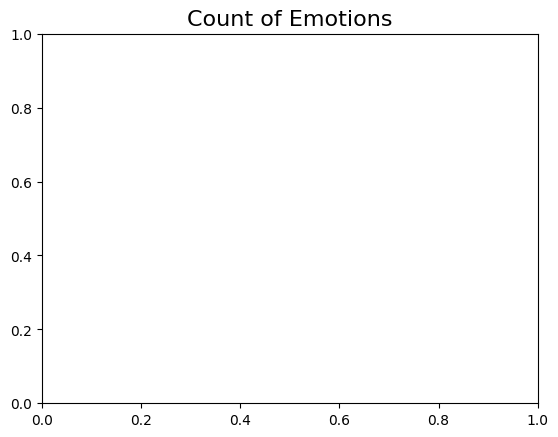

In [33]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [34]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [35]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [36]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [37]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [38]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [39]:
len(X), len(Y), data_path.path.shape

(2376, 2376, (792,))

In [40]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.066384,0.521950,0.564255,0.522136,0.525038,0.480282,0.497423,0.486130,0.467951,0.489792,...,0.005091,0.003716,0.004355,0.004634,0.003594,0.002324,0.001653,0.000810,0.000080,Sadness
1,0.123377,0.555456,0.591558,0.557236,0.572896,0.531008,0.524196,0.497598,0.482882,0.510166,...,0.021440,0.021235,0.022657,0.022122,0.021249,0.019576,0.019172,0.018621,0.018059,Sadness
2,0.070953,0.501591,0.539460,0.513228,0.529661,0.513430,0.455068,0.496686,0.468396,0.467993,...,0.000737,0.001073,0.000965,0.000712,0.001048,0.000808,0.000660,0.000280,0.000014,Sadness
3,0.048186,0.511845,0.465228,0.448148,0.447310,0.434028,0.506444,0.654540,0.717071,0.552414,...,0.000225,0.000239,0.000200,0.000133,0.000086,0.000059,0.000049,0.000026,0.000002,Disgust
4,0.252808,0.651200,0.615330,0.613439,0.626553,0.624847,0.622800,0.673327,0.718279,0.627200,...,0.010272,0.010522,0.010293,0.010701,0.010406,0.010757,0.010324,0.010632,0.010539,Disgust


In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]
(1900, 155, 1)
(476, 155, 1)


(2376, 6)

In [42]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise'],
      dtype=object)

In [43]:
#Accuarte class labels

In [44]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp8_m_05.wav,-36.562824,-34.678226,-34.729774,-34.625645,-34.253635,-34.384209,-35.142368,-35.282578,...,-15.781397,-11.513783,-7.686689,-6.210385,-5.820165,-6.033599,-8.823420,-15.813701,-22.438196,-25.376783
1,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss2_s1_sp15_m_02.wav,-47.192764,-45.981640,-46.217033,-46.778893,-47.426411,-46.973213,-46.127914,-45.830891,...,-29.806147,-30.610313,-31.560566,-33.569252,-35.816540,-38.012215,-39.652985,-41.552788,-42.537003,-42.204933
2,Disgust,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp10_m_02.wav,-35.910946,-34.349247,-35.214737,-35.019932,-34.430035,-33.993721,-34.269073,-34.192627,...,-29.172146,-29.997137,-30.299114,-31.091187,-31.674028,-32.116428,-32.216671,-31.448856,-30.965645,-32.530373
3,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s4_sp12_f_05.wav,-35.318737,-34.013950,-34.613037,-34.966385,-35.337688,-34.585037,-33.613869,-33.348438,...,-30.923130,-30.091656,-29.807673,-30.213699,-30.148012,-30.223164,-30.458088,-30.504625,-30.288572,-32.083042
4,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s2_sp18_f_04.wav,-24.851036,-28.143766,-34.749676,-37.652710,-38.547588,-38.757965,-38.438019,-37.236614,...,-23.872171,-23.372808,-22.494795,-20.946035,-21.957136,-23.227465,-25.641560,-32.677185,-36.173218,-34.618935
5,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s1_sp21_f_04.wav,-36.765427,-33.022640,-33.466705,-36.730858,-40.636848,-41.825298,-41.418797,-39.207672,...,-34.746262,-24.220766,-22.504660,-19.735586,-14.615258,-14.985373,-15.848074,-16.233473,-18.507147,-15.475809
6,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp1_m_04.wav,-52.944122,-51.572525,-51.139378,-48.233879,-47.837746,-49.564487,-49.921585,-49.700275,...,-31.569752,-34.474823,-30.085962,-26.256998,-25.119083,-25.587255,-27.692493,-29.637302,-31.995684,-34.030708
7,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp1_m_05.wav,-48.456310,-46.414337,-45.955757,-45.933567,-46.159302,-43.999115,-40.456451,-35.978397,...,-22.590494,-22.352943,-22.391893,-24.010826,-27.517889,-30.125338,-29.642246,-27.699877,-26.622723,-25.445305
8,Sadness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s3_sp2_m_05.wav,-50.272526,-48.814827,-48.535366,-48.531136,-48.365517,-48.752274,-49.068901,-48.054016,...,-32.666904,-27.172546,-24.046047,-24.564819,-24.922955,-24.344791,-23.176071,-23.522404,-21.931887,-19.055008
9,Happiness,/kaggle/input/bangla-lang-ser-dataset/BANSpEmo Dataset/ss1_s6_sp2_m_04.wav,-42.700325,-40.568855,-39.918980,-40.054626,-40.515285,-40.903214,-40.997440,-41.449883,...,-26.643421,-22.631111,-19.652288,-17.637653,-14.866203,-14.963853,-13.111524,-10.170065,-10.638855,-12.023705


ValueError: could not convert string to float: 'Sadness'

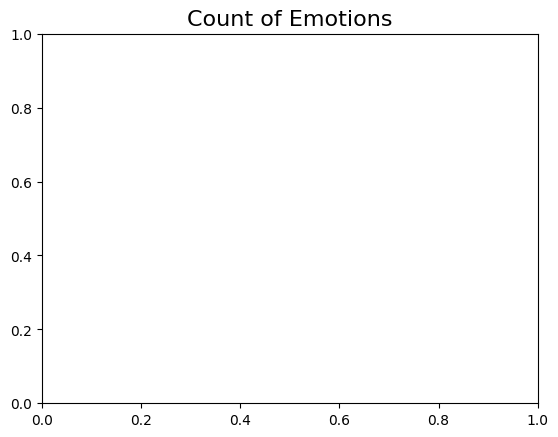

In [45]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [46]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [47]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [48]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [49]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [50]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [51]:
len(X), len(Y), data_path.path.shape

(3168, 3168, (792,))

In [52]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.066384,0.521950,0.564255,0.522136,0.525038,0.480282,0.497423,0.486130,0.467951,0.489792,...,0.005091,0.003716,0.004355,0.004634,0.003594,0.002324,0.001653,0.000810,0.000080,Sadness
1,0.088194,0.528254,0.568212,0.534166,0.541150,0.500935,0.502169,0.487259,0.475324,0.491895,...,0.006381,0.005091,0.005671,0.005954,0.004913,0.003478,0.002812,0.002095,0.001233,Sadness
2,0.070953,0.501591,0.539460,0.513228,0.529661,0.513430,0.455068,0.496686,0.468396,0.467993,...,0.000737,0.001073,0.000965,0.000712,0.001048,0.000808,0.000660,0.000280,0.000014,Sadness
3,0.071622,0.514853,0.561799,0.519616,0.533862,0.504879,0.457128,0.476965,0.445270,0.477403,...,0.000777,0.001183,0.000716,0.000723,0.000821,0.000818,0.000558,0.000211,0.000012,Sadness
4,0.048186,0.511845,0.465228,0.448148,0.447310,0.434028,0.506444,0.654540,0.717071,0.552414,...,0.000225,0.000239,0.000200,0.000133,0.000086,0.000059,0.000049,0.000026,0.000002,Disgust


In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
(2534, 155, 1)
(634, 155, 1)


(3168, 6)

In [54]:
lb.classes_

array(['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise'],
      dtype=object)

In [56]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/kaggle/input/german-model/german_models/model1-emo-db.weights.h5')
model2 = load_model('/kaggle/input/german-model/german_models/model2-emo-db.weights.h5')
model3 = load_model('/kaggle/input/german-model/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Accuracy Score for model1 =  0.14195583596214512
Accuracy Score for model2 =  0.14353312302839116
Accuracy Score for model3 =  0.16876971608832808
Accuracy Score for average ensemble =  0.1529968454258675
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
Weighted average method
Accuracy Score for model1 =  0.14195583596214512
Accuracy Score for model2 =  0.14353312302839116
Accuracy Score for model3 =  0.16876971608832808
Accuracy Score for average ensemble =  0.1529968454258675
Accuracy Score for weighted average ensemble =  0.15141955835962145
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Max accuracy of 

ValueError: Shape of passed values is (7, 7), indices imply (6, 6)

In [57]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step
Weighted average method
Accuracy Score for model1 =  0.14195583596214512
Accuracy Score for model2 =  0.14353312302839116
Accuracy Score for model3 =  0.16876971608832808
Accuracy Score for average ensemble =  0.1529968454258675
Accuracy Score for weighted average ensemble =  0.1498422712933754


ValueError: Shape of passed values is (7, 7), indices imply (6, 6)